### Doppler Velocity : Point particle / Extended target


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


<IPython.core.display.Javascript object>


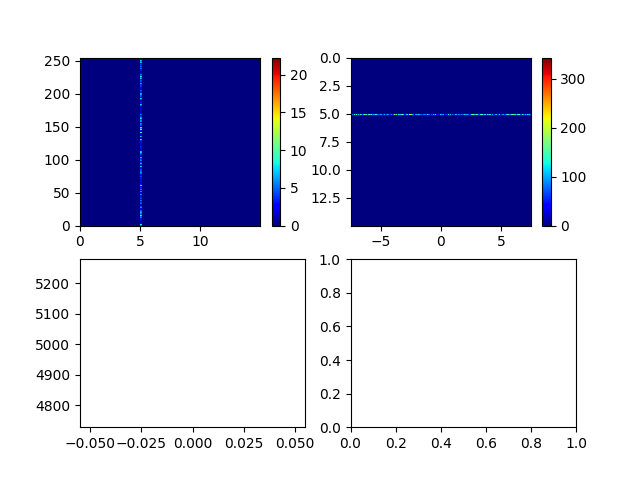

In [97]:
#RADAR Speifications
%matplotlib notebook
%reset

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.fftpack import *
import matplotlib.colors as mcolors


N = 1 # Number of targets
target_pos = []
target_vel = []

# for m in range(N):
#     if m < 2:
#         target_pos.append(5e3 + np.random.randn(1)*1e2)
#     elif (m > 4) & (m < 6):
#         target_pos.append(1e3 + np.random.randn(1)*1e2)
#     else:
#         target_pos.append(3e3 + np.random.randn(1)*1e2)
        
# for l in range(N):
#     if l < 2:
#         target_vel.append(3 + np.random.randn(1)*1e-1)
#     elif (m > 2) & (m < 6):
#         target_vel.append(-1 + np.random.randn(1)*1e-1)
#     else:
#         target_vel.append(6 + np.random.randn(1)*1e-1)

for m in range(N):
    target_pos.append(5e3 + np.random.randn(1)*1e2)
        
for l in range(N):
    target_vel.append(3 + np.random.randn(1)*1e-1)

F = 10e9
c0 = 3e8

lamb = c0/F
PRT = 1e-3
hits_scan = 256

delta_v = lamb/(2*hits_scan*PRT)

v_amb = lamb/(4 * PRT)

vel_axis = np.linspace(-v_amb,v_amb,hits_scan)

dR = 1

R_max = 15e3

Range_bins =  int(np.round(R_max/dR))

#range_axis = np.linspace(0, Range_bins - 1, Range_bins)*dR
range_axis = np.arange(0, Range_bins)*dR
#target_pos = 5e3

tau = 0.1e3
# vt = 30

data = []
target_range_index = []
actual_pos = []
target_pos_ = []

for i in range(hits_scan):
    signal = np.zeros(Range_bins)
    signal = signal.astype(complex)

    for k in range(N):
        target_pos_ = target_pos[k] + target_vel[k] * PRT * (i) #+ (PRT * i) ** (1) * 1
        target_range = target_pos_ + np.arange(0, tau-1, dR)
        ph = 2*np.pi*2*target_range/lamb
        target_range_index = np.round(target_range/dR)
        target_range_index = target_range_index.astype(int)
        signal[target_range_index] = np.exp(1j * ph) + np.random.randn(1) * 6 + np.random.randn(1) * 5
    data.append(signal)
   
    
freq_axis = list(range(hits_scan))


#ax = fig.gca(projection='3d')
fig, ax = plt.subplots(2, 2)

data = np.reshape(data, (hits_scan, Range_bins))

data_doppler = np.fft.fftshift(np.fft.fft(data,n=None,axis=0), axes=0)

#ax.plot_surface(r, f, abs(data), cmap=cm.jet)
raw_data = ax[0, 0].imshow(abs(data), aspect='auto', 
                extent=(range_axis[0]*1e-3, range_axis[-1]*1e-3, freq_axis[0], freq_axis[-1]),
               cmap=cm.jet)

fig.colorbar(raw_data, ax=ax[0, 0])


range_doppler = ax[0, 1].imshow(abs((data_doppler.T)), aspect='auto',
                                extent=(vel_axis[0], vel_axis[-1],range_axis[-1]*1e-3, range_axis[0]*1e-3), 
                                cmap=cm.jet)

fig.colorbar(range_doppler, ax=ax[0, 1])

ax[1, 0].plot(target_pos)



plt.show()

<IPython.core.display.Javascript object>


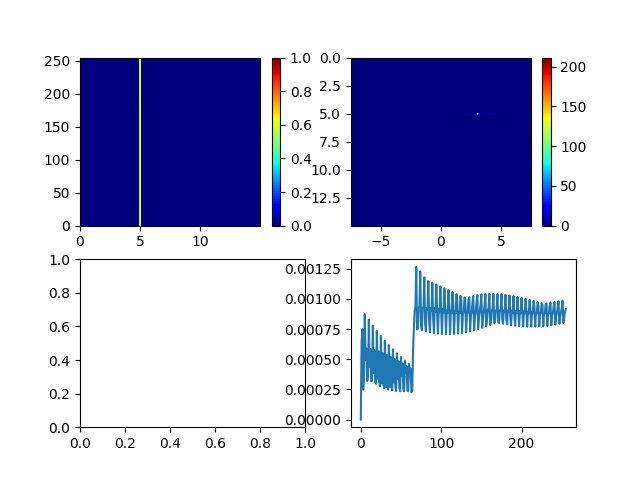

<ipython-input-1-2a248c1dcdff>:125: RuntimeWarning: divide by zero encountered in true_divide
  F_zomega = process_noise_var/(1 - a_init * np.exp(-1j * np.angle(a_init)))
<ipython-input-1-2a248c1dcdff>:125: RuntimeWarning: invalid value encountered in true_divide
  F_zomega = process_noise_var/(1 - a_init * np.exp(-1j * np.angle(a_init)))


In [1]:
# Adaptive filtering Khain, Ventura, Pinsky

# one particle in the atmosphere 


#RADAR Speifications
%matplotlib notebook


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.fftpack import *
import matplotlib.colors as mcolors
# import sys
# np.set_printoptions(threshold=sys.maxsize)

N = 1 # Number of targets
target_pos = []
target_vel = []

for m in range(N):
    target_pos.append(5e3 + np.random.randn(1)*1e2)
        
for l in range(N):
    target_vel.append(3 + np.random.randn(1)*1e-1)

F = 10e9
c0 = 3e8

lamb = c0/F
PRT = 1e-3
hits_scan = 256

delta_v = lamb/(2*hits_scan*PRT)

v_amb = lamb/(4 * PRT)

vel_axis = np.linspace(-v_amb,v_amb,hits_scan)

dR = 1

R_max = 15e3

Range_bins =  int(np.round(R_max/dR))

#range_axis = np.linspace(0, Range_bins - 1, Range_bins)*dR
range_axis = np.arange(0, Range_bins-1)*dR
#target_pos = 5e3

tau = 0.1e3
# vt = 30

data = []
target_range_index = []
actual_pos = []
target_pos_ = []

process_noise_var = 8
measurement_noise_var = 10

for i in range(hits_scan):
    signal = np.zeros(Range_bins)
    signal = signal.astype(complex)

    for k in range(N):
        target_pos_ = target_pos[k] + target_vel[k] * PRT * (i)
        target_range = target_pos_ + np.arange(0, tau-1, dR)
        ph = 2*np.pi*2*target_range/lamb
        target_range_index = np.round(target_range/dR)
        target_range_index = target_range_index.astype(int)
        signal[target_range_index] = np.exp(1j * ph) #+ np.random.randn() * process_noise_var + np.random.randn() * measurement_noise_var
    data.append(signal)

data = np.reshape(data, (hits_scan, Range_bins))


freq_axis = list(range(hits_scan))


data_doppler = np.fft.fftshift(np.fft.fft(data,n=None,axis=0), axes=0)

fig, ax = plt.subplots(2, 2)

data = np.reshape(data, (hits_scan, Range_bins))

raw_data = ax[0, 0].imshow(abs(data), aspect='auto', 
                extent=(range_axis[0]*1e-3, range_axis[-1]*1e-3, freq_axis[0], freq_axis[-1]),
               cmap=cm.jet)

fig.colorbar(raw_data, ax=ax[0, 0])

data_model = []
data_model_var = []
a_init = []
theta_init = []


data_model.append(np.ones(Range_bins))
#data_model = data_model.astype(complex)
data_model_var.append(np.ones(Range_bins))
#data_model_var = data_model_var.astype(complex)
a_init.append(np.ones(Range_bins))
#a_init = a_init.astype(complex)
theta_init.append(np.ones(Range_bins))
#theta_init = theta_init.astype(complex)

for b in range(hits_scan - 1):
    #predict
    a_init.append(a_init[b] + theta_init[b] * (data_model[b] * (data[b + 1] - a_init[b]))/(process_noise_var + measurement_noise_var + theta_init[b]*np.square(data_model[b])))
    theta_init.append(theta_init[b] - (theta_init[b]) ** 2 * (np.abs(data_model[b]) ** 2) / (process_noise_var + measurement_noise_var + theta_init[b]*np.square(data_model[b])))
    #update
    data_model.append(a_init[b + 1] * data_model[b] + \
    ((process_noise_var + np.abs(a_init[b + 1]) ** 2 * data_model_var[b]) * \
     (data[b + 1] - a_init[b + 1] * data_model[b])) / (process_noise_var + measurement_noise_var + \
                                                       np.abs(a_init[b + 1]) ** 2 * data_model_var[b]))
    data_model_var.append((process_noise_var + np.abs(a_init[b + 1]) ** 2 * data_model_var[b]) - \
    (process_noise_var + np.abs(a_init[b + 1]) ** 2 * data_model_var[b]) ** 2 /(process_noise_var + measurement_noise_var + np.abs(a_init[b + 1]) ** 2 * data_model_var[b]))      
    

data_model = np.array(data_model)

a_init = np.array(a_init)

F_zomega = process_noise_var/(1 - a_init * np.exp(-1j * np.angle(a_init)))


range_doppler = ax[0, 1].imshow(abs((data_doppler.T)), aspect='auto',
                                extent=(vel_axis[0], vel_axis[-1],range_axis[-1]*1e-3, range_axis[0]*1e-3), 
                                cmap=cm.jet)

fig.colorbar(range_doppler, ax=ax[0, 1])


# range_doppler_adap = ax[1, 0].imshow(np.angle(F_zomega.T), aspect='auto',
#                                 extent=(vel_axis[0], vel_axis[-1],range_axis[-1]*1e-3, range_axis[0]*1e-3), 
#                                 cmap=cm.jet)

# fig.colorbar(range_doppler_adap, ax=ax[1, 0])
    
    
ax[1, 1].plot(np.max(np.angle(a_init.T), 0) * lamb/2)

In [ ]:
data_model

In [63]:
data_model = []

data_model.append([np.zeros(np.size(range_axis))])
data_model.append(np.ones(np.size(range_axis)))

In [90]:
np.mean(data_doppler.T, 1).size

15000

In [ ]:
a_init